<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/DSPT5_132_Intermediate_Linear_Algebra1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. A review of statistical terms

### 1.1 Variance & Standard Deviation
Suppose we have a list of widgets. What is the mean, variance, and standard deviation of this list?

In [0]:
# here's the list.
widgets = [451, 330, 570, 390, 410]

In [0]:
# which libraries should we import here?
import numpy as np
import pandas as pd
import math

In [0]:
# find the mean
total = sum(widgets)
mean_widgets=total/len(widgets)
mean_widgets

430.2

#### Variance

In [0]:
# first write a little function 
def subtract_mean(number):
  return number-mean_widgets
# Note: this can be converted to lambda for efficiency:

lambda x:x-mean-widgets

<function __main__.<lambda>>

In [0]:
# use `map` to apply that function to our list 
distances = list(map(subtract_mean, widgets))
distances

[20.80000000000001,
 -100.19999999999999,
 139.8,
 -40.19999999999999,
 -20.19999999999999]

In [0]:
# square and sum all of those distances
squared_distances = list(map(lambda x: x**2, distances))
squared_distances

[432.6400000000005,
 10040.039999999997,
 19544.040000000005,
 1616.039999999999,
 408.03999999999957]

In [0]:
# how long is our list?

# for a sample taken from a population
list_length_sample = len(squared_distances)-1

# for a whole population (no sample)
list_length_pop = len(squared_distances)

In [0]:
# calculate variance
variance_widgets = sum(squared_distances)/list_length_pop
print('{:.2f}'.format(variance_widgets))

6408.16


#### standard dev

In [0]:
# calculate the standard deviation
print('{:.2f}'.format(math.sqrt(variance_widgets)))
print('{:.2f}'.format(np.sqrt(variance_widgets)))


80.05
80.05


In [0]:
# check our work using numpy
print('{:.2f}'.format(np.mean(widgets)))
print('{:.2f}'.format(np.var(widgets)))
print('{:.2f}'.format(np.std(widgets)))

430.20
6408.16
80.05


In [0]:
# check our work using pandas
widgets_df = pd.DataFrame({'widgets':widgets})
print('mean:', widgets_df['widgets'].mean())

mean: 430.2


In [0]:
# for a population
print('{:.2f}'.format(widgets_df['widgets'].var(ddof=0)))
print('{:.2f}'.format(widgets_df['widgets'].std(ddof=0)))

6408.16
80.05


In [0]:
# for a sample
print('{:.2f}'.format(widgets_df['widgets'].var(ddof=1)))
print('{:.2f}'.format(widgets_df['widgets'].std(ddof=1)))

8010.20
89.50


### 1.2 Covariance
Find the covariance between widgets and gadgets.

In [0]:
# make a new list
gadgets = [410, 505, 371, 220, 625]

In [0]:
# using numpy
np.cov(widgets, gadgets)

array([[ 8010.2 , -2919.05],
       [-2919.05, 22889.7 ]])

In [0]:
# using pandas
widgets_df['gadgets']= pd.Series(gadgets)
widgets_df

,widgets,gadgets
0,451,410
1,330,505
2,570,371
3,390,220
4,410,625


In [0]:
widgets_df.cov()

,widgets,gadgets
widgets,8010.20,-2919.05
gadgets,-2919.05,22889.70


### 1.3 Correlation Coefficient 
Find the correlation coefficient that summarizes the relationship between widgets and gadgets. 

In [0]:
# Calculate the standard dev of both lists using pandas.
std_w = widgets_df['widgets'].std(ddof=1)
std_g = widgets_df['gadgets'].std(ddof=1)

In [0]:
# Calculate covariance using pandas
cov_wg = widgets_df['widgets'].cov(widgets_df['gadgets'])
cov_wg

-2919.0499999999997

In [0]:
# Calculate the denominator
denom = std_w*std_g
denom

13540.719144122293

In [0]:
# Calculate correlation
corr_wg = cov_wg/denom
corr_wg

-0.2155756994093693

In [0]:
## Check work using pandas
widgets_df['widgets'].corr(widgets_df['gadgets'])

-0.21557569940936924

In [0]:
# A shorter way to do this
widgets_df.corr()

,widgets,gadgets
widgets,1.000000,-0.215576
gadgets,-0.215576,1.000000


### 1.4 The Variance-Covariance Matrix
Import a dataset of residential properties in Washington DC. Calculate the variance-covariance matrix and correlation matrix for the dataset's numeric columns.

In [0]:
# source: https://www.kaggle.com/christophercorrea/dc-residential-properties/
url = 'https://raw.githubusercontent.com/austinlasseter/dash-scatterplot-housing/master/dchouses.csv'

In [0]:
houses = pd.read_csv(url)
houses.head()

,BATHRM,HF_BATHRM,KITCHENS,HEAT,AC,ROOMS,PRICE
0,1,1,1.0,Forced Air,Y,6,NaN
1,2,1,1.0,Hot Water Rad,Y,8,460000.0
2,1,0,1.0,Hot Water Rad,N,6,NaN
3,1,0,1.0,Hot Water Rad,N,6,NaN
4,3,1,1.0,Warm Cool,Y,7,410220.0


In [0]:
# calculate the covariance for the entire dataset
houses.cov()

,BATHRM,HF_BATHRM,KITCHENS,ROOMS,PRICE
BATHRM,1.007166,0.125448,0.329582,1.866127e+00,-5.164766e+05
HF_BATHRM,0.125448,0.340972,-0.067744,4.989159e-01,4.109166e+05
KITCHENS,0.329582,-0.067744,0.420696,9.291807e-01,-6.497264e+03
ROOMS,1.866127,0.498916,0.929181,7.218137e+00,-3.030853e+06
PRICE,-516476.554036,410916.625989,-6497.264022,-3.030853e+06,1.551202e+14


In [0]:
# calculate the correlation for the entire dataset
houses.corr()

,BATHRM,HF_BATHRM,KITCHENS,ROOMS,PRICE
BATHRM,1.000000,0.214070,0.461896,0.692115,-0.042109
HF_BATHRM,0.214070,1.000000,-0.173102,0.318021,0.058728
KITCHENS,0.461896,-0.173102,1.000000,0.592760,-0.021364
ROOMS,0.692115,0.318021,0.592760,1.000000,-0.088273
PRICE,-0.042109,0.058728,-0.021364,-0.088273,1.000000


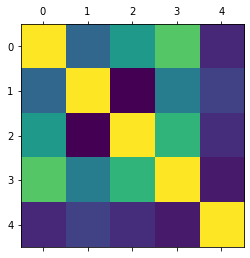

In [0]:
import matplotlib.pyplot as plt
plt.matshow(houses.corr())
plt.show()

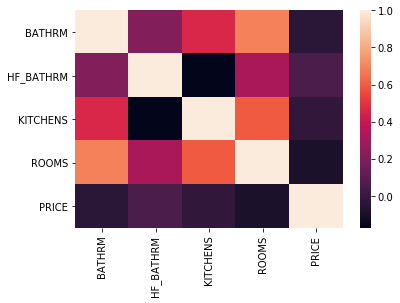

In [0]:
import seaborn as sns
sns.heatmap(houses.corr() )

## 2. Orthogonality

### 2.1 Quick review of norm and dot product.

In [0]:
# let's make a couple of vectors.
v = np.random.randint(low = 1, high = 100, size = 3)
x = np.random.randint(low = 1, high = 100, size = 3)
print(v,'\n', x)

[46 54 79] 
 [ 3  6 82]


In [0]:
# quick: which one is longer? 
for vect in [v, x]:
  norm = np.linalg.norm(vect)
  print(norm)

106.17438485811914
82.27393268830657


In [0]:
# what's the dot product of x and v? using array broadcasting
(v[0]*x[0]) + (v[1]*x[1]) + (v[2]*x[2])

6940

In [0]:
# what's the dot product of x and v? using numpy
np.dot(x, v)

6940

In [0]:
# there's another way to write this.
x.dot(v)

6940

### 2.2 Orthogonality

In [0]:
# import 
import matplotlib.pyplot as plt

In [0]:
# choose some vectors
vector_1 = [2, 2]
vector_2 = [1, -1]

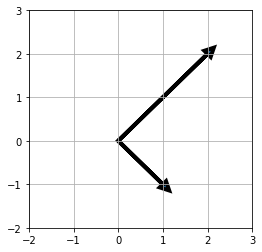

In [0]:
# Set up the figure so that x and y axes are symmetrical.
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,3)          
plt.ylim(-2,3)

# Plot the vectors
for vect in [vector_1, vector_2]:
    plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=0.2, linewidth=4)
plt.show()

Are the following vectors orthogonal?

In [0]:
# If dot product != 0, then vectors are not orthogonal.
np.dot(vector_1, vector_2)

0

In [0]:
# If dot product = 0, then vectors are orthogonal.
a = np.array([-7, 4])
b = np.array([-5, 3])
np.dot(a, b)

47

In [0]:
# If dot product = 0, then vectors are orthogonal.
a = np.array([0,4])
b = np.array([-5,0])
np.dot(a,b)

0

In [0]:
# For any vector, generate another vector that is orthogonal to it.
k = np.random.randn(3) # take any random vector.
print(k)

[ 1.5323009  -0.30384728  2.07250122]


In [0]:
x = np.random.randn(3)
x

array([ 0.05469083, -0.44090905,  0.13527156])

In [0]:
x -= x.dot(k)*k/np.linalg.norm(k)**2
print(x)

[-0.0586296  -0.41843819 -0.01799908]


In [0]:
np.dot(x, k)

6.245004513516506e-17

## 3. Unit Vectors

In [0]:
# Suppose we have a vector f.
f = np.random.randint(1, 100, 5)
f

array([32, 66, 28, 97, 63])

In [0]:
# how long is it?
norm_f = np.linalg.norm(f)
norm_f

139.79270367225894

In [0]:
# find its unit vector. the hat symbol (f^) indicates it's a unit vector.
f_hat = f/norm_f
f_hat

array([0.22891037, 0.47212765, 0.20029658, 0.69388457, 0.4506673 ])

In [0]:
# how long is this?
f_hat_norm = np.linalg.norm(f_hat)
f_hat_norm

1.0

## 4. Linear Independence / Dependence 

Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# Linearly dependent vectors
vector_1 = [-.8, 1.3]
vector_2 = np.multiply(vector_1, 2)
print(vector_1, '\n', vector_2)

[-0.8, 1.3] 
 [-1.6  2.6]


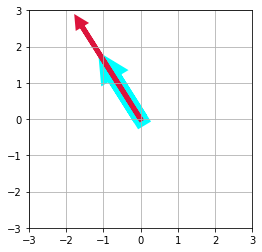

In [0]:
# Plot the vectors

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

In [0]:
# Linearly independent vectors, not orthogonal
vector_1 = np.random.randint(low=-3, high=3, size=2)
vector_2 = np.random.randint(low=-3, high=3, size=2)
print(vector_1, '\n', vector_2)

[ 1 -3] 
 [-3 -2]


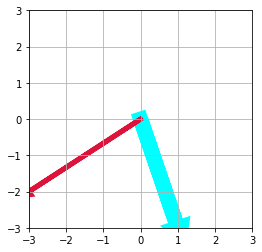

In [0]:
# Set up the grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

# Plot the vectors
for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

## 5. Span

Suppose we have two vectors. The linear combination is as follows, where a and b are any scalars.

\begin{align}
a\begin{bmatrix} 1 & 3 \end{bmatrix} +
b\begin{bmatrix} 2 & 1 \end{bmatrix}
\end{align}

Note that:
* The set of all possible linear combinations (i.e., all possible values of a and b) is the span of these vectors. 
* A set of vectors _spans_ a space if their linear combinations fill the space.
* The span of most pairs of 2D vectors is the entire infinite sheet of infinite space (unless they are colinear). 

In [0]:
# Let's take two vectors.
vector_1 = np.array([1,3])
vector_2 = np.array([2,1])

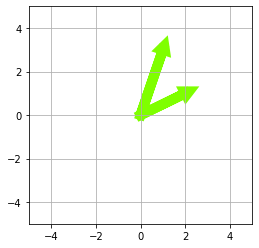

In [0]:
# Plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Display
for myvect in [vector_1, vector_2]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='chartreuse')

In [0]:
# This is one possible linear combination:
a,b=(2,3)
linear_combo= np.multiply(vector_1, a) + np.multiply(vector_2, b) 
print(linear_combo)

[8 9]


In [0]:
# This is a set of several linear combinations:
muchos_combos=[]
for (a,b) in [(2,3), (4,5), (6,7), (8,9)]:
    linear_combo = np.multiply(vector_1, a) + np.multiply(vector_2, b) 
    muchos_combos.append(linear_combo)
print(muchos_combos)

[array([8, 9]), array([14, 17]), array([20, 25]), array([26, 33])]


## 6. Basis

In 2-dimensional space $\mathbb{R}^2$, ANY vector (a,b) can be decomposed as the linear combination of the basis vectors (1,0) and (0,1). Since these are unit vectors, they are called "orthonormal basis".

(a,b) = a(1,0) + b(0,1)

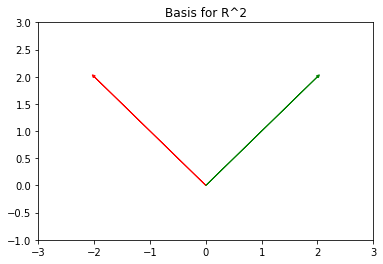

In [0]:
# find basis vectors in 2-d
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Basis for R^2")
plt.show()

## 7. Rank

In [0]:
# Rank two
P = np.array([[1,2,3],[4,5,6]])

#calculte its rank
np.linalg.matrix_rank(P)

2

In [0]:
# another example
k=np.array([[1,0,1],
[-2,-3,1],
[3,3,0]])
k

array([[ 1,  0,  1],
       [-2, -3,  1],
       [ 3,  3,  0]])

In [0]:
# rank
np.linalg.matrix_rank(k)

2

In [0]:
# Return a 2-D array with ones on the diagonal and zeros elsewhere.
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [0]:
# rank three
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)

3

In [0]:
# rank four
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [0]:
# rank four
np.linalg.matrix_rank(np.eye(4))

4

In [0]:
# Rank zero
P = np.array([0])
print(np.linalg.matrix_rank(P))
np.eye(0)

0


array([], shape=(0, 0), dtype=float64)

In [0]:
# Rank one
P = np.array([[1,2,3]])
np.linalg.matrix_rank(P)

1

In [0]:
# Rank one
np.eye(1)

array([[1.]])

## 8. Linear Projections

Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 

In [0]:
# Original Vector
numpy_v = np.array([2,1])
numpy_w = np.array([-3,3])

In [0]:
# dot product
w_dot_v = np.dot(numpy_v, numpy_w)
v_dot_v = np.dot(numpy_v, numpy_v)

In [0]:
# projection
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[-27.6 -32.4 -47.4]


In [0]:
# Get Vals for L
x_vals = np.array(ax.get_xlim())
y_vals = 3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


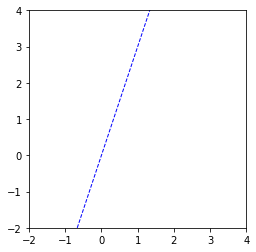

In [0]:
# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)